In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [677]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [678]:
defects_orig = pd.read_excel("C:\\DataSets\\Ericsson\\Defects\\Defects_AMX_Peru.xlsx", encoding = "ISO-8859-1", parse_dates=['Creation Date'])

In [679]:
defects_orig.shape

(1516, 36)

In [802]:
defects = defects_orig.copy(deep = True)

In [803]:
defects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 36 columns):
Type                         1516 non-null object
Id                           1516 non-null int64
Status                       1516 non-null object
Development Status           558 non-null object
Priority                     1516 non-null object
Severity                     1516 non-null object
Due Date                     1323 non-null datetime64[ns]
Filed Against                1516 non-null object
Found In                     1516 non-null object
Approvals                    0 non-null float64
Archived                     1516 non-null bool
BUC                          784 non-null object
CRM - Catalog Sync           0 non-null float64
Country Affected             3 non-null object
Created By                   1516 non-null object
Creation Date                1516 non-null datetime64[ns]
Defect Type                  1516 non-null object
Detection Phase              1516 non-n

In [804]:
pd.isnull(defects).sum()

Type                            0
Id                              0
Status                          0
Development Status            958
Priority                        0
Severity                        0
Due Date                      193
Filed Against                   0
Found In                        0
Approvals                    1516
Archived                        0
BUC                           732
CRM - Catalog Sync           1516
Country Affected             1513
Created By                      0
Creation Date                   0
Defect Type                     0
Detection Phase                 0
Duplicated By                1493
Market Segmentation           952
Modified By                     0
Modified Date                   0
Owned By                        0
Planned For                     0
Product Defect                  0
Project Area                    0
Reopen Counter                  0
Reopen Date                  1187
Resolution                    262
Resolution Dat

In [805]:
#consider only TCRM  and Closed defects

In [806]:
condition = ['TCRM', 'TCRM Translation', 'Migration TCRM', 'TCRM Cosmetic']

In [807]:
df_tcrm = defects[defects['Filed Against'].isin(condition)]

In [808]:
df_tcrm.shape

(899, 36)

In [809]:
df_tcrm['Filed Against'].value_counts()

TCRM                849
TCRM Translation     35
TCRM Cosmetic         8
Migration TCRM        7
Name: Filed Against, dtype: int64

In [810]:
df_tcrm = df_tcrm[df_tcrm['Status'] == 'Closed']

In [811]:
df_tcrm.shape

(796, 36)

In [812]:
#there are many null values or no values for the below columns, hence will be deleted

In [813]:
cols_to_drop = ['Approvals', 'CRM - Catalog Sync', 'Country Affected']

In [814]:
df_tcrm['Type'].unique()

array(['Defect'], dtype=object)

In [815]:
df_tcrm['Archived'].unique()

array([False])

In [816]:
df_tcrm['Reopen Counter'].value_counts()

0    796
Name: Reopen Counter, dtype: int64

In [817]:
df_tcrm['Defect Type'].value_counts()

Unassigned    796
Name: Defect Type, dtype: int64

In [818]:
df_tcrm['Restricted Access'].value_counts()

RLAM_CSI_OBS_AMX_ONE_PERU    796
Name: Restricted Access, dtype: int64

In [819]:
#The columns Type, Archived, Reopen Counter, Defect Type, Restricted Access can be dropped, as it has single value

In [820]:
cols_to_drop = ['Approvals', 'CRM - Catalog Sync', 'Country Affected', 'Type', 'Archived', 'Reopen Counter',
               'Defect Type', 'Restricted Access']

In [821]:
df_tcrm['Status'].value_counts()

Closed    796
Name: Status, dtype: int64

In [822]:
df_tcrm['Filed Against'].value_counts()

TCRM                752
TCRM Translation     29
TCRM Cosmetic         8
Migration TCRM        7
Name: Filed Against, dtype: int64

In [823]:
df_tcrm['Detection Phase'].value_counts()

Intrastack Testing                     605
System Testing (Development Only)      117
System Integration Testing              48
Sanity                                  11
Unit Testing (Development Only)          4
Post Production Support                  3
Regression Testing                       2
Intrastack Testing - Ofers               2
Intrastack Testing - Flujos              2
Intrastack Testing - Datos Migrados      1
Funcional                                1
Name: Detection Phase, dtype: int64

In [824]:
df_tcrm['Filed Against'].value_counts()

TCRM                752
TCRM Translation     29
TCRM Cosmetic         8
Migration TCRM        7
Name: Filed Against, dtype: int64

In [825]:
cols_to_drop = ['Approvals', 'CRM - Catalog Sync', 'Country Affected', 'Type', 'Archived', 'Reopen Counter',
               'Defect Type', 'Restricted Access', 'Filed Against']

In [826]:
df_tcrm['Duplicated By'].value_counts()

#37113    2
#39809    1
#32339    1
#28667    1
#35935    1
#41635    1
#38227    1
#34053    1
#36383    1
#26597    1
#40350    1
#27053    1
#33768    1
Name: Duplicated By, dtype: int64

In [827]:
#Duplicated By has only few entries, hence can be deleted

In [828]:
df_tcrm['Market Segmentation'].value_counts()

Consumer    329
Name: Market Segmentation, dtype: int64

In [829]:
df_tcrm['Planned For'].value_counts()

Unassigned    796
Name: Planned For, dtype: int64

In [830]:
df_tcrm['Product Defect'].value_counts()

False    796
Name: Product Defect, dtype: int64

In [831]:
df_tcrm['Project Area'].value_counts()

RLAM_CSI_OBS_AMX_ONE_PERU    796
Name: Project Area, dtype: int64

In [832]:
#Subcribed By is not significant, hence we can delete it
df_tcrm['Subscribed By'].value_counts()

Anicka Michelle Cercado                                                                                                 21
Eduardo Chiroque                                                                                                        21
Melissa Sandoval\nGerardo Estrada\nRicardo Serrudo Sánchez                                                              19
Ana Mendez                                                                                                              18
Sergio Briceno                                                                                                          17
Anicka Michelle Cercado\nGerardo Estrada                                                                                13
Sergio Briceno\nGerardo Estrada                                                                                         12
Melissa Sandoval                                                                                                        11
Felipe Assaf Alv

In [833]:
#Resolved By (Contributor) is not significant, hence can be deleted
df_tcrm['Resolved By (Contributor)'].value_counts()

Melissa Sandoval               108
Ana Mendez                      84
Eloisa Santos                   84
Anicka Michelle Cercado         82
Felipe Assaf Alves de Sousa     75
Sergio Briceno                  62
Eduardo Chiroque                55
Cyntia Jannet Figueroa          45
Carlos Javier Estrada           38
Manolo Gramajo                  34
Mirna Lorena Santos Perez       20
Maria Fernanda Figueroa         18
Katherine Velasquez             16
Fernando Custodio               16
Raul Hoyos                      14
Mirelly Arango                  10
Mariana Lima da Silva            7
Aysegul Acar Gunduz              5
Astrid Sanchez CermeÃ±o          5
Sergio Rodriguez                 4
Dario Guillen                    4
Bryan Alvaro Alfaro Pinto        2
Soumee Karmakar                  2
Arantxa Villavicencio Paz        2
Princess Reyes Campos            1
Rosa Iris Velando Saavedra       1
Martin Calagua                   1
Haroldo Chur                     1
Name: Resolved By (C

In [834]:
#it is not signifacent, hence cen be deleted
df_tcrm['System Affected'].value_counts()

TCRM          558
ERMS            8
N/A\nTCRM       6
ECM             5
EOM             4
ERMS\nTCRM      2
TCRM\nN/A       2
EMM             1
TCRM\nERMS      1
BSCS            1
Name: System Affected, dtype: int64

In [835]:
#these columns are not significant, hence can be deleted
df_tcrm['Created By'].value_counts()
df_tcrm['Modified By'].value_counts()
df_tcrm['Owned By'].value_counts()

Felipe Assaf Alves de Sousa    94
Melissa Sandoval               92
Eduardo Chiroque               90
Anicka Michelle Cercado        87
Ana Mendez                     74
Sergio Briceno                 72
Eloisa Santos                  71
Cyntia Jannet Figueroa         35
Carlos Javier Estrada          27
Manolo Gramajo                 26
Katherine Velasquez            20
Mirna Lorena Santos Perez      20
Raul Hoyos                     17
Maria Fernanda Figueroa        12
Aysegul Acar Gunduz            10
Fernando Custodio               8
Mirelly Arango                  7
Arantxa Villavicencio Paz       7
Mariana Lima da Silva           6
Astrid Sanchez CermeÃ±o         5
Soumee Karmakar                 4
Gerardo Estrada                 4
Sergio Rodriguez                2
Princess Reyes Campos           2
Rosa Iris Velando Saavedra      1
Dennis Hingueros                1
Martin Calagua                  1
Rafael  Lopes da Silva          1
Name: Created By, dtype: int64

Melissa Sandoval               108
Ana Mendez                      84
Eloisa Santos                   84
Anicka Michelle Cercado         81
Felipe Assaf Alves de Sousa     75
Sergio Briceno                  62
Eduardo Chiroque                55
Cyntia Jannet Figueroa          45
Carlos Javier Estrada           38
Manolo Gramajo                  34
Mirna Lorena Santos Perez       20
Maria Fernanda Figueroa         18
Katherine Velasquez             16
Fernando Custodio               16
Raul Hoyos                      14
Mirelly Arango                  10
Mariana Lima da Silva            7
Aysegul Acar Gunduz              5
Astrid Sanchez CermeÃ±o          5
Sergio Rodriguez                 4
Dario Guillen                    4
Bryan Alvaro Alfaro Pinto        2
Soumee Karmakar                  2
Arantxa Villavicencio Paz        2
Princess Reyes Campos            1
qm_user                          1
Rosa Iris Velando Saavedra       1
Martin Calagua                   1
Haroldo Chur        

Mariana Lima da Silva          115
Eloisa Santos                   84
Cyntia Jannet Figueroa          69
Ana Mendez                      61
Anicka Michelle Cercado         59
Felipe Assaf Alves de Sousa     59
Eduardo Chiroque                55
Melissa Sandoval                51
Sergio Briceno                  40
Katherine Velasquez             36
Carlos Javier Estrada           25
Manolo Gramajo                  21
Mirna Lorena Santos Perez       16
Carolina Acevedo                14
Juan Delgado                    10
Mirelly Arango                  10
Arindam Ganguli                  8
Maria Fernanda Figueroa          8
Raul Hoyos                       6
Ricardo Serrudo Sánchez          6
Astrid Sanchez CermeÃ±o          4
Aysegul Acar Gunduz              4
Arantxa Villavicencio Paz        3
Sergio Rodriguez                 3
Saurabh Purohit                  3
Ponraja Arumugam                 2
Bryan Alvaro Alfaro Pinto        2
Fabian Carrillo                  2
Soumee Karmakar     

In [836]:
#as of now delete reopen date we will analyze later

In [837]:
cols_to_drop = ['Approvals', 'CRM - Catalog Sync', 'Country Affected', 'Type', 'Archived', 'Reopen Counter',
               'Defect Type', 'Restricted Access', 'Filed Against', 'Duplicated By', 'Market Segmentation',
                'Planned For', 'Product Defect', 'Project Area', 'Subscribed By', 'Resolved By (Contributor)',
               'System Affected', 'Status', 'Created By', 'Modified By', 'Owned By', 'Reopen Date' ]

In [838]:
df_tcrm['Technology'].value_counts()

MOBILE POST PAID                   462
HFC                                 71
LFI                                 18
MOBILE POST PAID\nHFC                2
MOBILE POST PAID\nMOBILE HYBRID      2
MOBILE HYBRID                        2
N/A\nMOBILE POST PAID                1
HFC\nMOBILE POST PAID                1
LFI\nHFC                             1
N/A\nHFC                             1
LFI\nMOBILE POST PAID                1
Name: Technology, dtype: int64

In [839]:
df_tcrm['Technology'].fillna("Not Available", inplace = True)

In [840]:
df_tcrm_tech = df_tcrm['Technology'].value_counts()
df_tcrm_tech

MOBILE POST PAID                   462
Not Available                      234
HFC                                 71
LFI                                 18
MOBILE POST PAID\nHFC                2
MOBILE POST PAID\nMOBILE HYBRID      2
MOBILE HYBRID                        2
N/A\nMOBILE POST PAID                1
HFC\nMOBILE POST PAID                1
LFI\nHFC                             1
N/A\nHFC                             1
LFI\nMOBILE POST PAID                1
Name: Technology, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Technology')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Technology')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

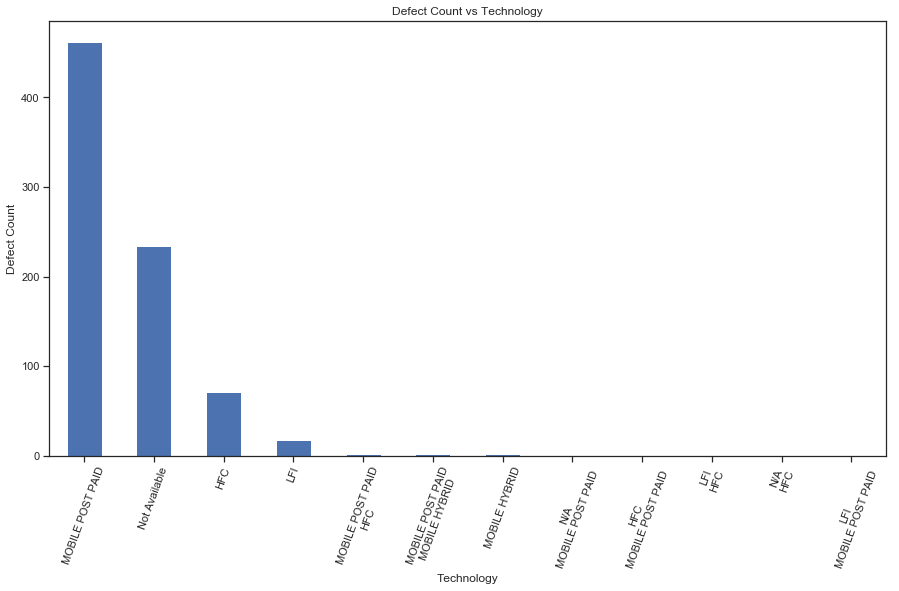

In [1160]:
plt.figure(figsize=(15,8))
plt.xlabel("Technology")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Technology")
plt.xticks(rotation=45)
df_tcrm_tech.plot.bar()
plt.xticks(rotation = 70)

In [842]:
df_tcrm['BUC'].fillna("Not Available", inplace = True)

In [843]:
df_tcrm['BUC'].value_counts()

Not Available                                                                    379
BUC 053 - Claro Case Management                                                   90
BUC 006 - New Subscription - Order Capture and Fulfillment                        49
BUC 052 - Generic Case Flow ( Not Regulated)                                      35
BUC 062 - OST Presencial                                                          27
BUC 097A - Advanced Payment BI                                                    14
BUC 076 - Cease Subscription                                                      10
BUC 049 - Change Ownership Between Consumer Customers                             10
BUC 060 - Individual Adjustments BI                                                8
BUC 100 - Direct Debit Affiliation BI                                              8
BUC 079 - Barring / Unbarring Order Capture and Fulfillment                        7
BUC 067 - Change Plan Order Capture                              

In [844]:
df_tcrm['Development Status'].value_counts()

Deployment Done in Master Dev                                                       114
Merged To Master Dev\nDeployment Done in Master Dev                                  99
Merged To Master Dev                                                                 53
Merged To Master Dev\nDeployment Done in Master Dev\nDeployment Done in QA           37
Done                                                                                 30
Done\nDeployment Done in Master Dev                                                  29
Deployment Done in Master Dev\nDeployment Done in QA                                 16
Dev Test Done                                                                        14
Rejected                                                                             10
On Hold                                                                               8
Dev Test Done\nDeployment Done in Master Dev                                          6
Merged To Master Dev DONE       

In [845]:
df_tcrm['Development Status'].fillna("Not Available", inplace = True)

In [846]:
df_tcrm_buc = df_tcrm['BUC'].value_counts()
df_tcrm_buc

Not Available                                                                    379
BUC 053 - Claro Case Management                                                   90
BUC 006 - New Subscription - Order Capture and Fulfillment                        49
BUC 052 - Generic Case Flow ( Not Regulated)                                      35
BUC 062 - OST Presencial                                                          27
BUC 097A - Advanced Payment BI                                                    14
BUC 076 - Cease Subscription                                                      10
BUC 049 - Change Ownership Between Consumer Customers                             10
BUC 060 - Individual Adjustments BI                                                8
BUC 100 - Direct Debit Affiliation BI                                              8
BUC 079 - Barring / Unbarring Order Capture and Fulfillment                        7
BUC 067 - Change Plan Order Capture                              

In [847]:
df_tcrm_buc_head15 = df_tcrm_buc.head(15)
df_tcrm_buc_head15

Not Available                                                  379
BUC 053 - Claro Case Management                                 90
BUC 006 - New Subscription - Order Capture and Fulfillment      49
BUC 052 - Generic Case Flow ( Not Regulated)                    35
BUC 062 - OST Presencial                                        27
BUC 097A - Advanced Payment BI                                  14
BUC 076 - Cease Subscription                                    10
BUC 049 - Change Ownership Between Consumer Customers           10
BUC 060 - Individual Adjustments BI                              8
BUC 100 - Direct Debit Affiliation BI                            8
BUC 079 - Barring / Unbarring Order Capture and Fulfillment      7
BUC 067 - Change Plan Order Capture                              7
BUC 074A - Consumer Modify Subscription Order Capture            7
BUC 006F - Configure services and resources                      7
BUC 020 - Create or Modify Connection                         

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'BUC')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs BUC')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

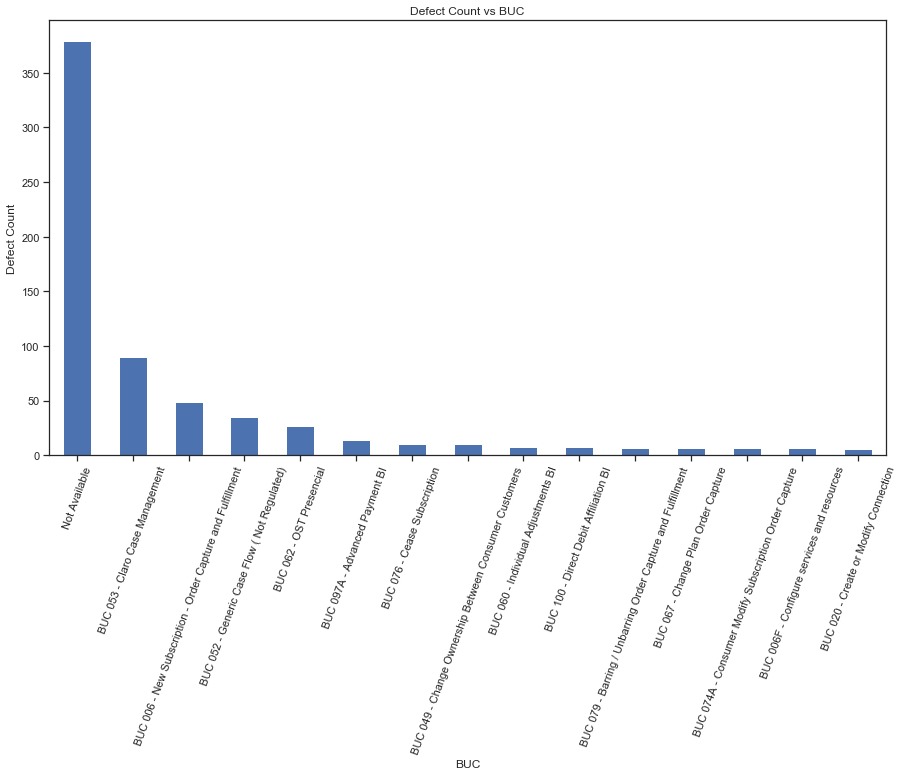

In [1159]:
plt.figure(figsize=(15,8))
plt.xlabel("BUC")
plt.ylabel("Defect Count")
plt.title("Defect Count vs BUC")
df_tcrm_buc_head15.plot.bar()
plt.xticks(rotation = 70)

In [849]:
#Fill Null Values of Due Date with Resolution Date

In [850]:
df_tcrm['Due Date'] = np.where(df_tcrm['Due Date'].isnull(), df_tcrm['Resolution Date'], df_tcrm['Due Date'])

In [851]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 36 columns):
Type                         796 non-null object
Id                           796 non-null int64
Status                       796 non-null object
Development Status           796 non-null object
Priority                     796 non-null object
Severity                     796 non-null object
Due Date                     796 non-null datetime64[ns]
Filed Against                796 non-null object
Found In                     796 non-null object
Approvals                    0 non-null float64
Archived                     796 non-null bool
BUC                          796 non-null object
CRM - Catalog Sync           0 non-null float64
Country Affected             2 non-null object
Created By                   796 non-null object
Creation Date                796 non-null datetime64[ns]
Defect Type                  796 non-null object
Detection Phase              796 non-null object
Du

In [852]:
df_tcrm.drop(cols_to_drop, axis=1, inplace=True)#delete the non-required columns

In [853]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 14 columns):
Id                     796 non-null int64
Development Status     796 non-null object
Priority               796 non-null object
Severity               796 non-null object
Due Date               796 non-null datetime64[ns]
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Modified Date          796 non-null datetime64[ns]
Resolution             796 non-null object
Resolution Date        796 non-null datetime64[ns]
Root Cause Analysis    796 non-null object
Technology             796 non-null object
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 93.3+ KB


In [854]:
df_tcrm.to_csv("C:\\DataSets\\Ericsson\\Defects\\amx_peru_defects_modified1.csv")

In [855]:
#t1 = df_tcrm.where(df_tcrm['Modified Date'] != df_tcrm['Resolution Date'])

In [856]:
t1 = df_tcrm[df_tcrm['Modified Date'] != df_tcrm['Resolution Date']]#check for how many records they are different

In [857]:
t1.shape

(1, 14)

In [858]:
t1.head()

,Id,Development Status,Priority,Severity,Due Date,Found In,BUC,Creation Date,Detection Phase,Modified Date,Resolution,Resolution Date,Root Cause Analysis,Technology
213,41914,Not Available,High,Blocker,2019-03-26 07:30:00,DROP 2_Sprint 4,BUC 099 - Refund BI,2019-03-22 01:00:00,Intrastack Testing,2019-04-01 22:24:00,Fixed,2019-04-01 22:23:00,Not Implemented Requirement,Not Available


In [859]:
#we can remove modified date

In [860]:
df_tcrm.drop(['Modified Date'], axis=1, inplace=True)

In [861]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 13 columns):
Id                     796 non-null int64
Development Status     796 non-null object
Priority               796 non-null object
Severity               796 non-null object
Due Date               796 non-null datetime64[ns]
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Resolution             796 non-null object
Resolution Date        796 non-null datetime64[ns]
Root Cause Analysis    796 non-null object
Technology             796 non-null object
dtypes: datetime64[ns](3), int64(1), object(9)
memory usage: 87.1+ KB


In [862]:
import datetime as dt

In [863]:
#calculate aging of defects
df_tcrm['DefectAgeInDays'] = (df_tcrm['Resolution Date'] - df_tcrm['Creation Date']).dt.days

In [864]:
df_tcrm.head()

,Id,Development Status,Priority,Severity,Due Date,Found In,BUC,Creation Date,Detection Phase,Resolution,Resolution Date,Root Cause Analysis,Technology,DefectAgeInDays
28,43956,Not Available,Low,Medium,2019-04-14 19:00:00,DROP 2_Sprint 4,BUC 006 - New Subscription - Order Capture and...,2019-04-13 19:12:00,Intrastack Testing,Fixed,2019-04-14 23:39:00,Minor Change / Improvement,MOBILE POST PAID,1
29,43932,Not Available,Low,Medium,2019-04-15 19:00:00,DROP 2_Sprint 2,BUC 084 - Change Number Order Capture and Fulf...,2019-04-13 00:39:00,Intrastack Testing,Fixed,2019-04-16 01:18:00,Environment Downtime,MOBILE POST PAID,3
37,43807,Deployment Done in Master Dev,High,High,2019-04-16 20:00:00,DROP 2 - FIJA FUNC,BUC 006 - New Subscription - Order Capture and...,2019-04-12 00:35:00,System Testing (Development Only),Fixed,2019-04-16 18:38:00,Minor Change / Improvement,LFI,4
41,43699,Deployment Done in Master Dev,High,High,2019-04-12 20:00:00,DROP 2_Sprint 4,BUC 060 - Individual Adjustments BI,2019-04-11 01:23:00,Intrastack Testing,Fixed,2019-04-16 01:13:00,Coding/Software Fault,Not Available,4
42,43698,Deployment Done in Master Dev,Low,Medium,2019-04-11 20:00:00,DROP 2_Sprint 3,BUC 049 - Change Ownership Between Consumer Cu...,2019-04-11 01:13:00,Intrastack Testing,Fixed,2019-04-11 20:53:00,Minor Change / Improvement,MOBILE POST PAID,0


In [865]:
#df_tcrm['DefectCreationMonth'] = df_tcrm['Creation Date'].dt.month

In [866]:
#df_tcrm['DefectCreationYear'] = df_tcrm['Creation Date'].dt.year

In [867]:
#we can remove creation date now
#df_tcrm.drop(['Creation Date'], axis=1, inplace=True)

In [868]:
#we can remove Due Date and Resolution Date
df_tcrm.drop(['Due Date', 'Resolution Date'], axis=1, inplace=True)

In [869]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 12 columns):
Id                     796 non-null int64
Development Status     796 non-null object
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 80.8+ KB


In [870]:
#we can remove Id
#df_tcrm.drop(['Id'], axis=1, inplace=True)
#we can remove Development Status
df_tcrm.drop(['Development Status'], axis=1, inplace=True)

In [871]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 11 columns):
Id                     796 non-null int64
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 74.6+ KB


In [872]:
df_tcrm_priority = df_tcrm['Priority'].value_counts()
df_tcrm_priority

Low       306
High      282
Medium    208
Name: Priority, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Priority')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Priority')

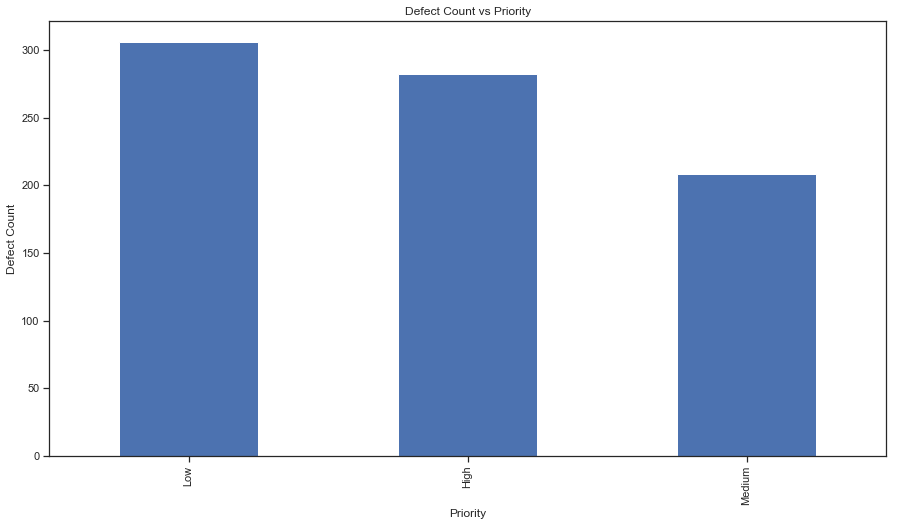

In [873]:
plt.figure(figsize=(15,8))
plt.xlabel("Priority")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Priority")
df_tcrm_priority.plot.bar()

In [874]:
df_tcrm_severity = df_tcrm['Severity'].value_counts()
df_tcrm_severity

Medium      496
High        171
Blocker      79
Critical     38
Minor        12
Name: Severity, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Severity')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Severity')

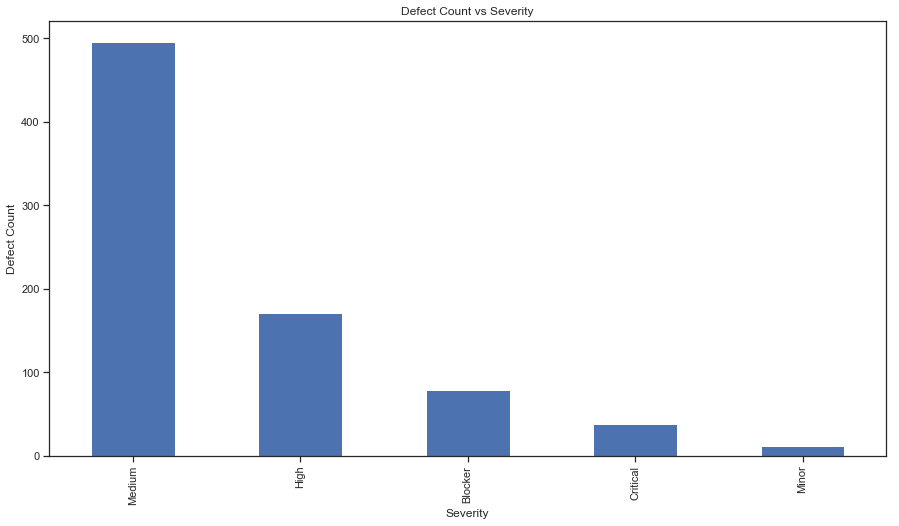

In [883]:
plt.figure(figsize=(15,8))
plt.xlabel("Severity")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Severity")
df_tcrm_severity.plot.bar()

In [1093]:
df_tcrm_found_in_series = df_tcrm['Found In'].value_counts()
#df_tcrm_found_in.insert("FoundIn", "NoOfDefects")
df_tcrm_found_in_series

DROP 2_Sprint 4        259
DROP 2_Sprint 2        248
DROP 2_Sprint 1        165
DROP 2 - FIJA FUNC      88
DROP 2_Sprint 3         22
Integracion_interno      7
DROP 2 - MIGRACION       5
Bill2Bill                1
DROP 1_1.1               1
Name: Found In, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Found In')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Found In')

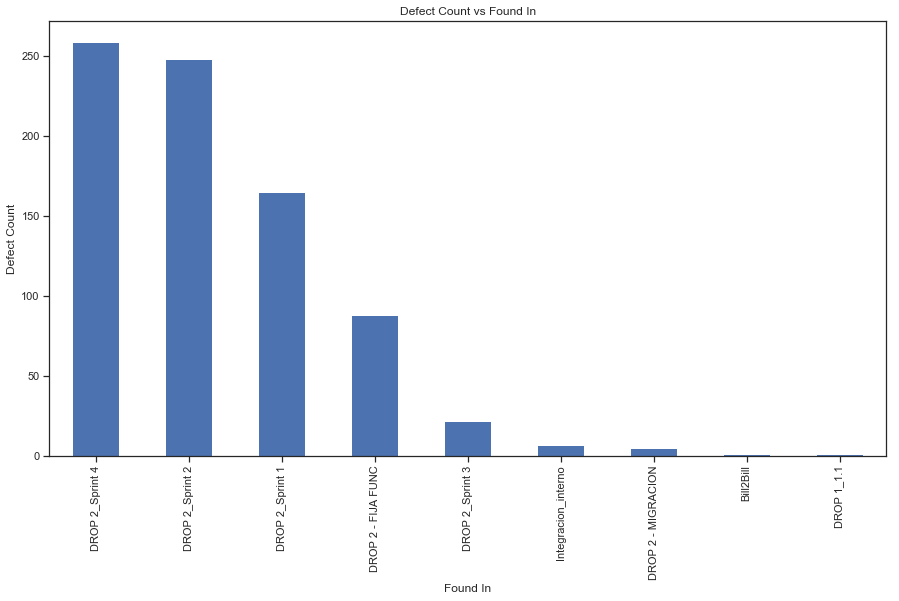

In [1095]:
plt.figure(figsize=(15,8))
plt.xlabel("Found In")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Found In")
df_tcrm_found_in_series.plot.bar()

In [1083]:
#perform pareto analysis

In [1096]:
type(df_tcrm_found_in_series)

pandas.core.series.Series

In [1097]:
df_tcrm_found_in = pd.DataFrame(df_tcrm_found_in_series).reset_index()
df_tcrm_found_in.columns = ['FoundIn', 'DefectCount']

In [1098]:
df_tcrm_found_in.head()

,FoundIn,DefectCount
0,DROP 2_Sprint 4,259
1,DROP 2_Sprint 2,248
2,DROP 2_Sprint 1,165
3,DROP 2 - FIJA FUNC,88
4,DROP 2_Sprint 3,22


In [1099]:
df_tcrm_found_in.to_csv("C:\\datasets\\Ericsson\\Defects\\df_tcrm_found_in.csv")

In [1101]:
df_tcrm_found_in = df_tcrm_found_in.set_index('FoundIn')
df_tcrm_found_in

,DefectCount
FoundIn,
DROP 2_Sprint 4,259
DROP 2_Sprint 2,248
DROP 2_Sprint 1,165
DROP 2 - FIJA FUNC,88
DROP 2_Sprint 3,22
Integracion_interno,7
DROP 2 - MIGRACION,5
Bill2Bill,1
DROP 1_1.1,1


In [1102]:
df_tcrm_found_in["cumpercentage"] = df_tcrm_found_in["DefectCount"].cumsum()/df_tcrm_found_in["DefectCount"].sum()*100

In [1103]:
df_tcrm_found_in

,DefectCount,cumpercentage
FoundIn,,
DROP 2_Sprint 4,259,32.537688
DROP 2_Sprint 2,248,63.693467
DROP 2_Sprint 1,165,84.422111
DROP 2 - FIJA FUNC,88,95.477387
DROP 2_Sprint 3,22,98.241206
Integracion_interno,7,99.120603
DROP 2 - MIGRACION,5,99.748744
Bill2Bill,1,99.874372
DROP 1_1.1,1,100.000000


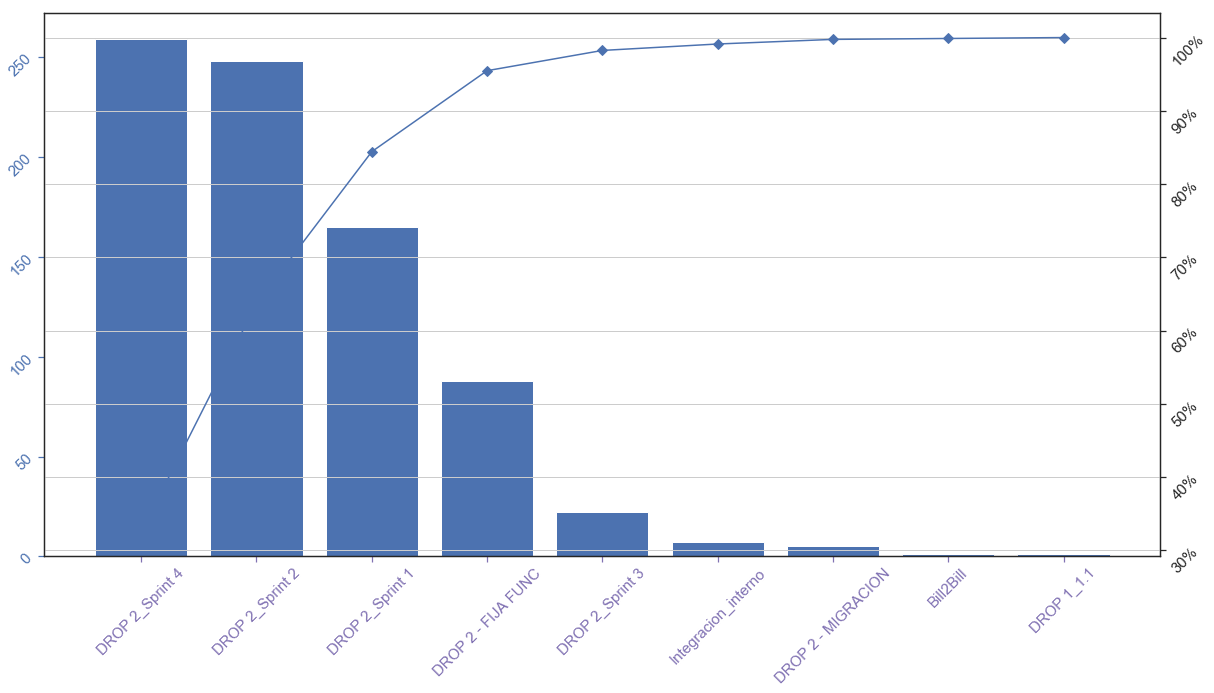

In [1127]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_tcrm_found_in.index, df_tcrm_found_in["DefectCount"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_tcrm_found_in.index, df_tcrm_found_in["cumpercentage"], marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

#plt.xticks(rotation=90)
ax.tick_params(axis="y", colors="C0", rotation=45, labelsize=15)
ax2.tick_params(axis="y", rotation=45, labelsize=15)
ax.tick_params(axis = "x", colors = "C4", rotation = 45, labelsize=15)
plt.grid()
plt.show();

In [878]:
df_tcrm_resolution = df_tcrm['Resolution'].value_counts()
df_tcrm_resolution

Fixed        713
Invalid       72
Duplicate     11
Name: Resolution, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Resolution')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Resolution')

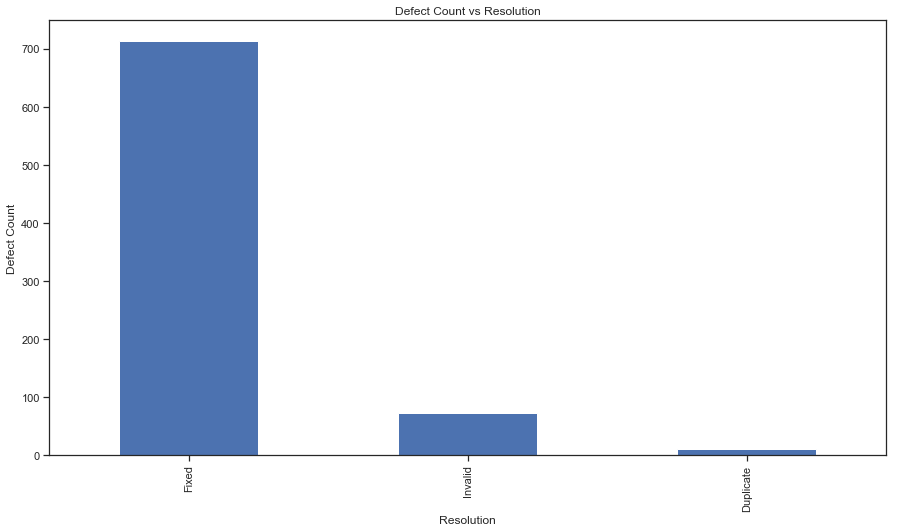

In [881]:
plt.figure(figsize=(15,8))
plt.xlabel("Resolution")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Resolution")
df_tcrm_resolution.plot.bar()

In [885]:
df_tcrm['DefectAgeInDays'].value_counts()

1      83
0      55
2      55
3      43
6      40
5      37
7      28
4      27
10     26
9      22
8      18
12     17
14     17
13     15
16     15
11     14
15     14
23     14
17     13
25     12
21     10
19     10
20      9
41      8
28      8
48      7
24      7
29      7
34      7
39      6
       ..
33      2
52      2
53      2
37      2
141     1
140     1
139     1
104     1
133     1
131     1
142     1
124     1
120     1
146     1
119     1
50      1
85      1
98      1
92      1
61      1
79      1
76      1
74      1
147     1
69      1
54      1
57      1
64      1
63      1
192     1
Name: DefectAgeInDays, Length: 94, dtype: int64

In [886]:
df_tcrm['DefectAgeInWeeks'] = (df_tcrm['DefectAgeInDays']/7).astype(int)#convert defectsAge in days to defectsAge in weeks

In [887]:
df_tcrm['DefectAgeInWeeks'].value_counts()

0     340
1     140
2      83
3      56
4      34
5      34
6      26
7      19
8      19
9      10
10      9
11      7
20      4
15      3
17      3
14      2
19      2
21      1
12      1
13      1
18      1
27      1
Name: DefectAgeInWeeks, dtype: int64

In [888]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 12 columns):
Id                     796 non-null int64
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
DefectAgeInWeeks       796 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 77.7+ KB


In [889]:
df_tcrm.describe()

,Id,DefectAgeInDays,DefectAgeInWeeks
count,796.000000,796.000000,796.000000
mean,36331.371859,18.559045,2.275126
std,4627.829225,24.914804,3.538245
min,26411.000000,0.000000,0.000000
25%,32028.500000,3.000000,0.000000
50%,37344.000000,9.000000,1.000000
75%,40146.750000,24.000000,3.000000
max,43956.000000,192.000000,27.000000


In [890]:
#Descriptive statistics on categorical data
df_tcrm.describe(include=['O'])

,Priority,Severity,Found In,BUC,Detection Phase,Resolution,Root Cause Analysis,Technology
count,796,796,796,796,796,796,796,796
unique,3,5,9,68,11,3,19,12
top,Low,Medium,DROP 2_Sprint 4,Not Available,Intrastack Testing,Fixed,Coding/Software Fault,MOBILE POST PAID
freq,306,496,259,379,605,713,270,462


### Analyze defect aging

In [891]:
import seaborn as sns

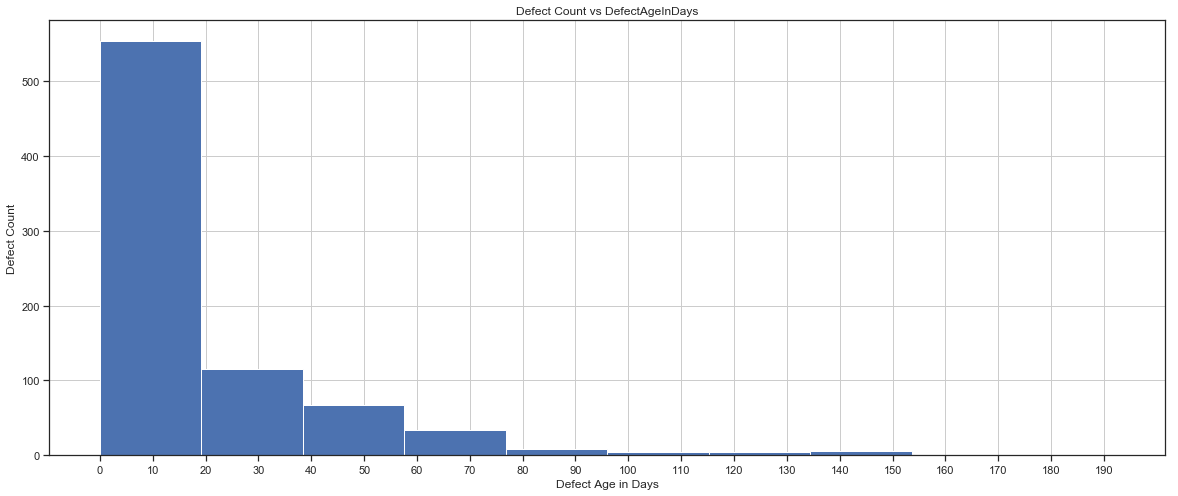

In [894]:
#check defectAging distribution
#sns.set(style = 'ticks', color_codes=True)
#defects_hist = sns.FacetGrid(df_tcrm)
#defects_hist.map(plt.hist, 'DefectAgeInDays', bins = 20)
df_tcrm.hist(column = 'DefectAgeInDays', bins = 10, figsize = (20,8))
plt.xticks(np.arange(0, 192, 10))
plt.xlabel("Defect Age in Days")
plt.ylabel("Defect Count")
plt.title("Defect Count vs DefectAgeInDays")
plt.show();

In [895]:
df_tcrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 12 columns):
Id                     796 non-null int64
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null datetime64[ns]
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
DefectAgeInWeeks       796 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 77.7+ KB


In [764]:
#The above figure says about the defect age distribution

In [765]:
#category.head()

In [766]:
#df_tcrm = pd.concat([df_tcrm, category], axis = 1)

In [767]:
#df_tcrm.head()

### Perform other analysis

In [932]:
df_tcrm.head()

,Id,Priority,Severity,Found In,BUC,Creation Date,Detection Phase,Resolution,Root Cause Analysis,Technology,DefectAgeInDays,DefectAgeInWeeks
28,43956,Low,Medium,DROP 2_Sprint 4,BUC 006 - New Subscription - Order Capture and...,2019-04-13,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,1,0
29,43932,Low,Medium,DROP 2_Sprint 2,BUC 084 - Change Number Order Capture and Fulf...,2019-04-13,Intrastack Testing,Fixed,Environment Downtime,MOBILE POST PAID,3,0
37,43807,High,High,DROP 2 - FIJA FUNC,BUC 006 - New Subscription - Order Capture and...,2019-04-12,System Testing (Development Only),Fixed,Minor Change / Improvement,LFI,4,0
41,43699,High,High,DROP 2_Sprint 4,BUC 060 - Individual Adjustments BI,2019-04-11,Intrastack Testing,Fixed,Coding/Software Fault,Not Available,4,0
42,43698,Low,Medium,DROP 2_Sprint 3,BUC 049 - Change Ownership Between Consumer Cu...,2019-04-11,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,0,0


In [1139]:
df_tcrm_RCA = df_tcrm['Root Cause Analysis'].value_counts()
df_tcrm_RCA

Coding/Software Fault                    270
Minor Change / Improvement               227
No fault / Working as designed            55
Not Implemented Requirement               48
System configuration fault                46
Out of Scope                              35
Consultation / How to                     27
Environment Downtime                      17
No Evidence / Fault not reproducible      15
Faulty Installation                       14
Wrongly tested                            13
Poor / Faulty Operation & Maintenance      9
Requirement Change                         4
Solution Design Fault                      4
Rejected - Not Contracted                  4
Rejected - Missing Handover                3
Out of Scope - Customer Definition         3
Ericsson Product Fault                     1
Endpoint                                   1
Name: Root Cause Analysis, dtype: int64

In [1140]:
type(df_tcrm_RCA)

pandas.core.series.Series

In [1133]:
#perform Pareto Analysis for RCA

In [1143]:
df_tcrm_RCA_df = pd.DataFrame(df_tcrm_RCA).reset_index()
df_tcrm_RCA_df.columns = ['RCA', 'DefectCount']
df_tcrm_RCA_df

,RCA,DefectCount
0,Coding/Software Fault,270
1,Minor Change / Improvement,227
2,No fault / Working as designed,55
3,Not Implemented Requirement,48
4,System configuration fault,46
5,Out of Scope,35
6,Consultation / How to,27
7,Environment Downtime,17
8,No Evidence / Fault not reproducible,15
9,Faulty Installation,14


In [1149]:
df_tcrm_RCA_df = df_tcrm_RCA_df.set_index('RCA')
df_tcrm_RCA_df

,DefectCount,cumpercentage
RCA,,
Coding/Software Fault,270,33.919598
Minor Change / Improvement,227,62.437186
No fault / Working as designed,55,69.346734
Not Implemented Requirement,48,75.376884
System configuration fault,46,81.155779
Out of Scope,35,85.552764
Consultation / How to,27,88.944724
Environment Downtime,17,91.080402
No Evidence / Fault not reproducible,15,92.964824


In [1150]:
df_tcrm_RCA_df["cumpercentage"] = df_tcrm_RCA_df["DefectCount"].cumsum()/df_tcrm_RCA_df["DefectCount"].sum()*100

In [1151]:
df_tcrm_RCA_df

,DefectCount,cumpercentage
RCA,,
Coding/Software Fault,270,33.919598
Minor Change / Improvement,227,62.437186
No fault / Working as designed,55,69.346734
Not Implemented Requirement,48,75.376884
System configuration fault,46,81.155779
Out of Scope,35,85.552764
Consultation / How to,27,88.944724
Environment Downtime,17,91.080402
No Evidence / Fault not reproducible,15,92.964824


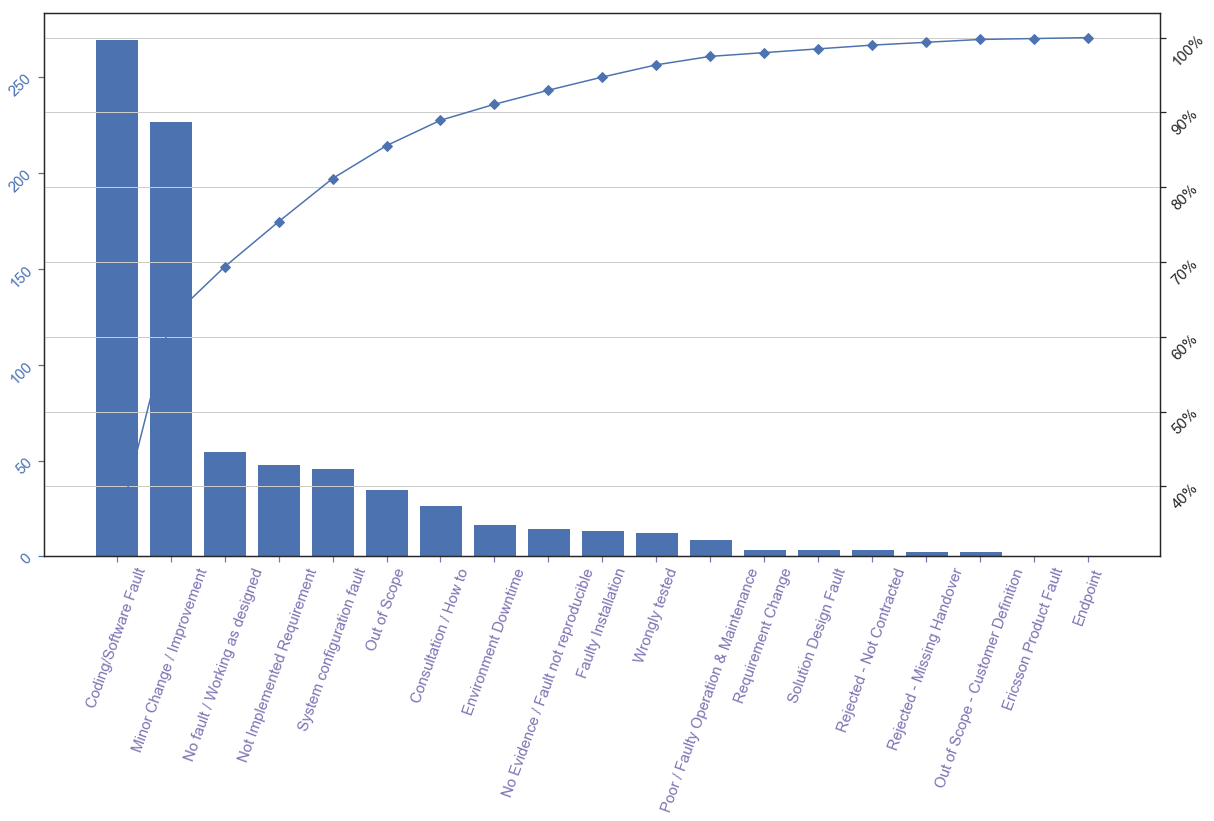

In [1153]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_tcrm_RCA_df.index, df_tcrm_RCA_df["DefectCount"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_tcrm_RCA_df.index, df_tcrm_RCA_df["cumpercentage"], marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0", rotation=45, labelsize=15)
ax2.tick_params(axis="y", rotation=45, labelsize=15)
ax.tick_params(axis = "x", colors = "C4", rotation = 70, labelsize=15)
plt.grid()
plt.show();

In [939]:
df_tcrm_RCA_head5 = df_tcrm_RCA.head(5)
df_tcrm_RCA_head5

Coding/Software Fault             270
Minor Change / Improvement        227
No fault / Working as designed     55
Not Implemented Requirement        48
System configuration fault         46
Name: Root Cause Analysis, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5,0,'Root Cause')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Defect Count vs Root Cause')

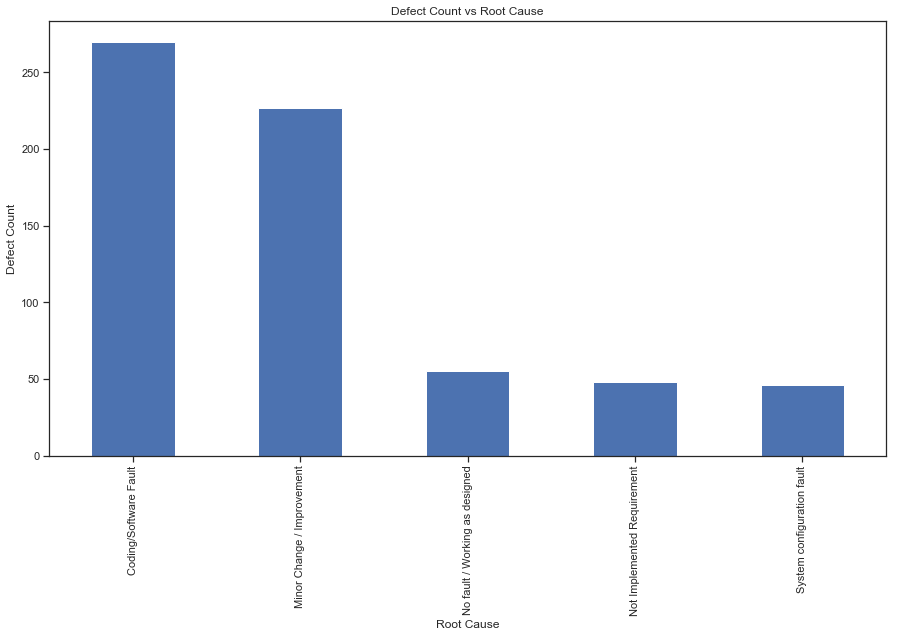

In [940]:
plt.figure(figsize=(15,8))
plt.xlabel("Root Cause")
plt.ylabel("Defect Count")
plt.title("Defect Count vs Root Cause")
df_tcrm_RCA_head5.plot.bar()

In [944]:
top5_root_cause = ['Coding/Software Fault','Minor Change / Improvement','No fault / Working as designed','Not Implemented Requirement','System configuration fault']
df_tcrm_top5_RCA = df_tcrm.loc[df_tcrm['Root Cause Analysis'].isin(top5_root_cause)]
df_tcrm.info()
df_tcrm_top5_RCA.info()
df_tcrm_top5_RCA.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 12 columns):
Id                     796 non-null int64
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null object
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
DefectAgeInWeeks       796 non-null int32
dtypes: int32(1), int64(2), object(9)
memory usage: 77.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 28 to 1510
Data columns (total 12 columns):
Id                     646 non-null int64
Priority               646 non-null object
Severity               646 non-null object
Found In               646 non-null object
BUC                    646 non-null objec

,Id,Priority,Severity,Found In,BUC,Creation Date,Detection Phase,Resolution,Root Cause Analysis,Technology,DefectAgeInDays,DefectAgeInWeeks
28,43956,Low,Medium,DROP 2_Sprint 4,BUC 006 - New Subscription - Order Capture and...,2019-04-13,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,1,0
37,43807,High,High,DROP 2 - FIJA FUNC,BUC 006 - New Subscription - Order Capture and...,2019-04-12,System Testing (Development Only),Fixed,Minor Change / Improvement,LFI,4,0
41,43699,High,High,DROP 2_Sprint 4,BUC 060 - Individual Adjustments BI,2019-04-11,Intrastack Testing,Fixed,Coding/Software Fault,Not Available,4,0
42,43698,Low,Medium,DROP 2_Sprint 3,BUC 049 - Change Ownership Between Consumer Cu...,2019-04-11,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,0,0
45,43674,Low,Medium,DROP 2_Sprint 1,BUC 039E - 360 view: Cases,2019-04-10,Intrastack Testing,Fixed,Coding/Software Fault,MOBILE POST PAID,6,0


In [945]:
df_tcrm_RCA_top5_FoundIn = df_tcrm_top5_RCA.groupby(['Root Cause Analysis','Found In'])['Id'].count()
df_tcrm_RCA_top5_FoundIn
#this will give us which functionality caused more issues across different root causes

Root Cause Analysis             Found In           
Coding/Software Fault           DROP 2 - FIJA FUNC      34
                                DROP 2_Sprint 1         54
                                DROP 2_Sprint 2        100
                                DROP 2_Sprint 3          4
                                DROP 2_Sprint 4         77
                                Integracion_interno      1
Minor Change / Improvement      DROP 1_1.1               1
                                DROP 2 - FIJA FUNC      33
                                DROP 2 - MIGRACION       4
                                DROP 2_Sprint 1         34
                                DROP 2_Sprint 2         50
                                DROP 2_Sprint 3          8
                                DROP 2_Sprint 4         96
                                Integracion_interno      1
No fault / Working as designed  DROP 2 - FIJA FUNC       4
                                DROP 2_Sprint 1         14
    

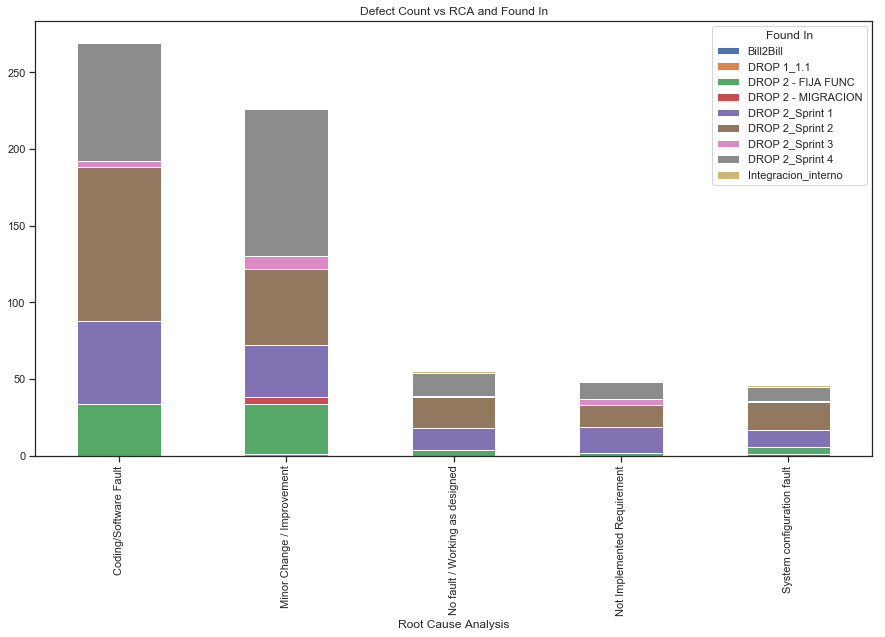

In [956]:
#df_tcrm_RCA_top5_FoundIn
#plt.figure(figsize=(15,8))
#plt.xlabel("RCA with Found In")
#plt.ylabel("Defect Count")
#plt.title("Defect Count vs RCA and Found In")
df_tcrm_RCA_top5_FoundIn_unstack = df_tcrm_RCA_top5_FoundIn.unstack()
df_tcrm_RCA_top5_FoundIn_unstack.plot(kind = 'bar', stacked = True, figsize=(15,8), title = "Defect Count vs RCA and Found In")

In [957]:
df_tcrm_RCA_top5_DetectionPhase = df_tcrm_top5_RCA.groupby(['Root Cause Analysis','Detection Phase'])['Id'].count()
df_tcrm_RCA_top5_DetectionPhase

Root Cause Analysis             Detection Phase                    
Coding/Software Fault           Intrastack Testing                     212
                                Sanity                                   5
                                System Integration Testing              10
                                System Testing (Development Only)       43
Minor Change / Improvement      Intrastack Testing                     162
                                Intrastack Testing - Datos Migrados      1
                                Post Production Support                  1
                                Regression Testing                       1
                                Sanity                                   3
                                System Integration Testing              16
                                System Testing (Development Only)       41
                                Unit Testing (Development Only)          2
No fault / Working as designed  

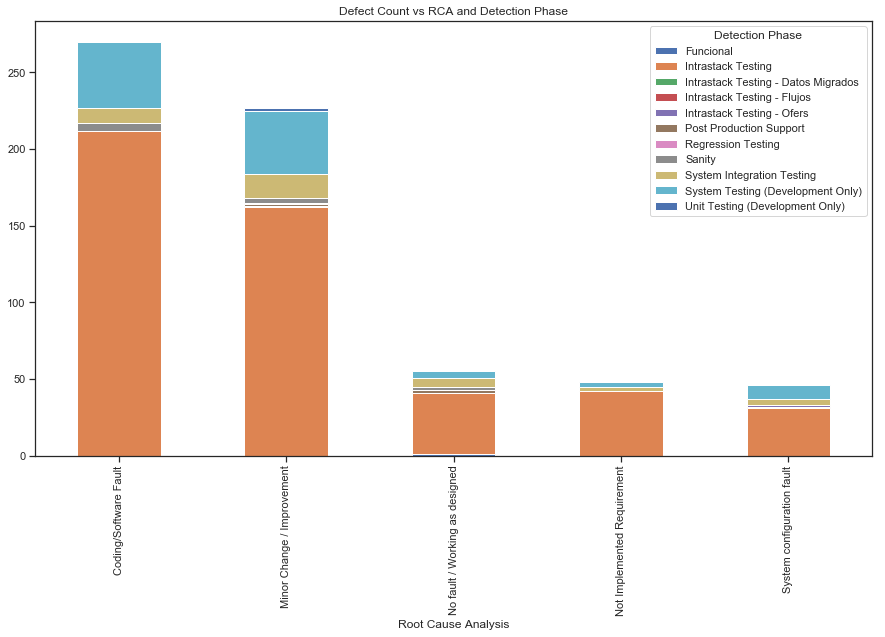

In [959]:
df_tcrm_RCA_top5_DetectionPhase_unstack = df_tcrm_RCA_top5_DetectionPhase.unstack()
df_tcrm_RCA_top5_DetectionPhase_unstack.plot(kind = 'bar', stacked = True, figsize=(15,8), title = "Defect Count vs RCA and Detection Phase")

In [960]:
df_tcrm_RCA_top5_Technology = df_tcrm_top5_RCA.groupby(['Root Cause Analysis','Technology'])['Id'].count()
df_tcrm_RCA_top5_Technology

Root Cause Analysis             Technology                     
Coding/Software Fault           HFC                                 32
                                HFC\nMOBILE POST PAID                1
                                LFI                                  3
                                LFI\nMOBILE POST PAID                1
                                MOBILE HYBRID                        1
                                MOBILE POST PAID                   151
                                Not Available                       81
Minor Change / Improvement      HFC                                 24
                                LFI                                 10
                                MOBILE POST PAID                   121
                                MOBILE POST PAID\nHFC                1
                                MOBILE POST PAID\nMOBILE HYBRID      1
                                Not Available                       70
No fault / Wo

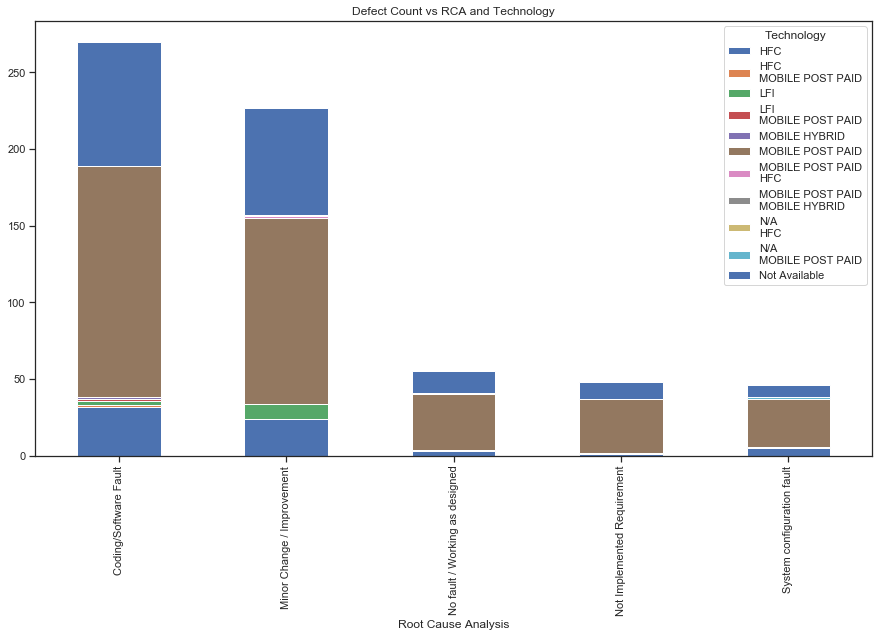

In [961]:
df_tcrm_RCA_top5_Technology_unstack = df_tcrm_RCA_top5_Technology.unstack()
df_tcrm_RCA_top5_Technology_unstack.plot(kind = 'bar', stacked = True, figsize=(15,8), title = "Defect Count vs RCA and Technology")

In [973]:
#no of defects across BUC
df_tcrm_grpby_BUCDefctCnt = df_tcrm.groupby(['BUC'])['Id'].count().reset_index()
df_tcrm_grpby_BUCDefctCnt_sorted = df_tcrm_grpby_BUCDefctCnt.sort_values('Id', ascending = False)
df_tcrm_grpby_BUCDefctCnt_sorted_head10 = df_tcrm_grpby_BUCDefctCnt_sorted.head(10)
df_tcrm_grpby_BUCDefctCnt_sorted_head10

,BUC,Id
66,Not Available,379
32,BUC 053 - Claro Case Management,90
2,BUC 006 - New Subscription - Order Capture and...,49
31,BUC 052 - Generic Case Flow ( Not Regulated),35
35,BUC 062 - OST Presencial,27
50,BUC 097A - Advanced Payment BI,14
29,BUC 049 - Change Ownership Between Consumer Cu...,10
44,BUC 076 - Cease Subscription,10
33,BUC 060 - Individual Adjustments BI,8
55,BUC 100 - Direct Debit Affiliation BI,8


In [974]:
df_tcrm_grpby_BUCDefctCnt_sorted_head10.columns

Index(['BUC', 'Id'], dtype='object')

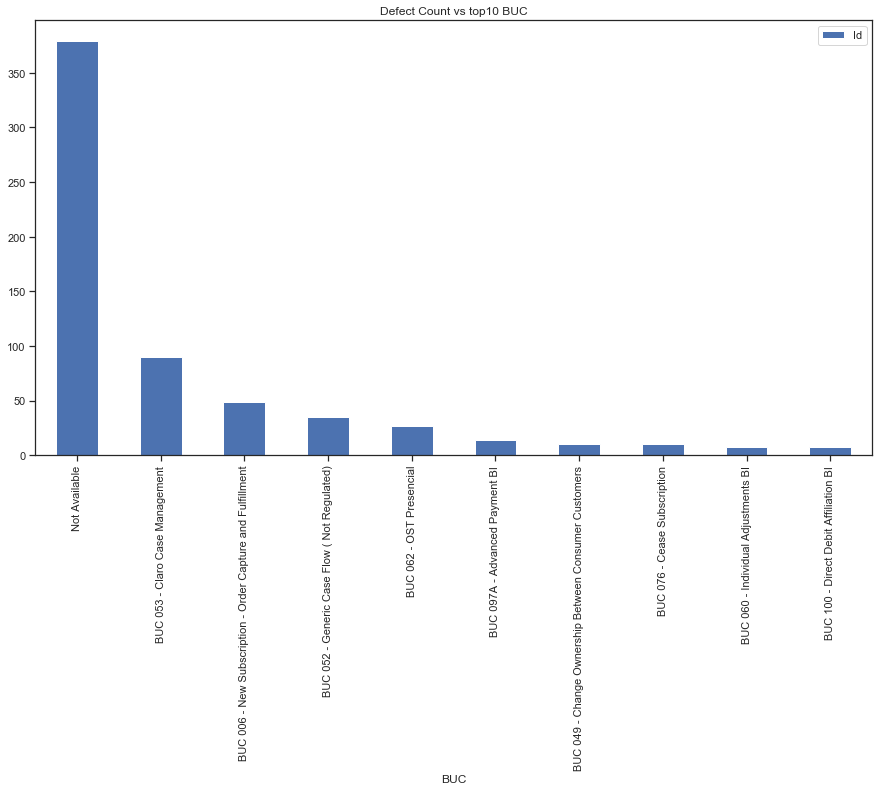

In [977]:
df_tcrm_grpby_BUCDefctCnt_sorted_head10.plot(x = 'BUC', kind = 'bar', figsize=(15,8), title = "Defect Count vs top10 BUC")

In [980]:
#no of defects across BUC
df_tcrm_grpby_BUCDefectAgeInDays = df_tcrm.groupby(['BUC'])['DefectAgeInDays'].mean().reset_index()
df_tcrm_grpby_BUCDefectAgeInDays_sorted = df_tcrm_grpby_BUCDefectAgeInDays.sort_values('DefectAgeInDays', ascending = False)
df_tcrm_grpby_BUCDefectAgeInDays_sorted_head10 = df_tcrm_grpby_BUCDefctCnt_sorted.head(10)
df_tcrm_grpby_BUCDefectAgeInDays_sorted_head10

,BUC,Id
66,Not Available,379
32,BUC 053 - Claro Case Management,90
2,BUC 006 - New Subscription - Order Capture and...,49
31,BUC 052 - Generic Case Flow ( Not Regulated),35
35,BUC 062 - OST Presencial,27
50,BUC 097A - Advanced Payment BI,14
29,BUC 049 - Change Ownership Between Consumer Cu...,10
44,BUC 076 - Cease Subscription,10
33,BUC 060 - Individual Adjustments BI,8
55,BUC 100 - Direct Debit Affiliation BI,8


In [986]:
df_tcrm_grpby_BUCDefectAgeInDays_sorted_head10.to_csv("C:\\datasets\\Ericsson\\Defects\\BU_DefectsAging.csv")

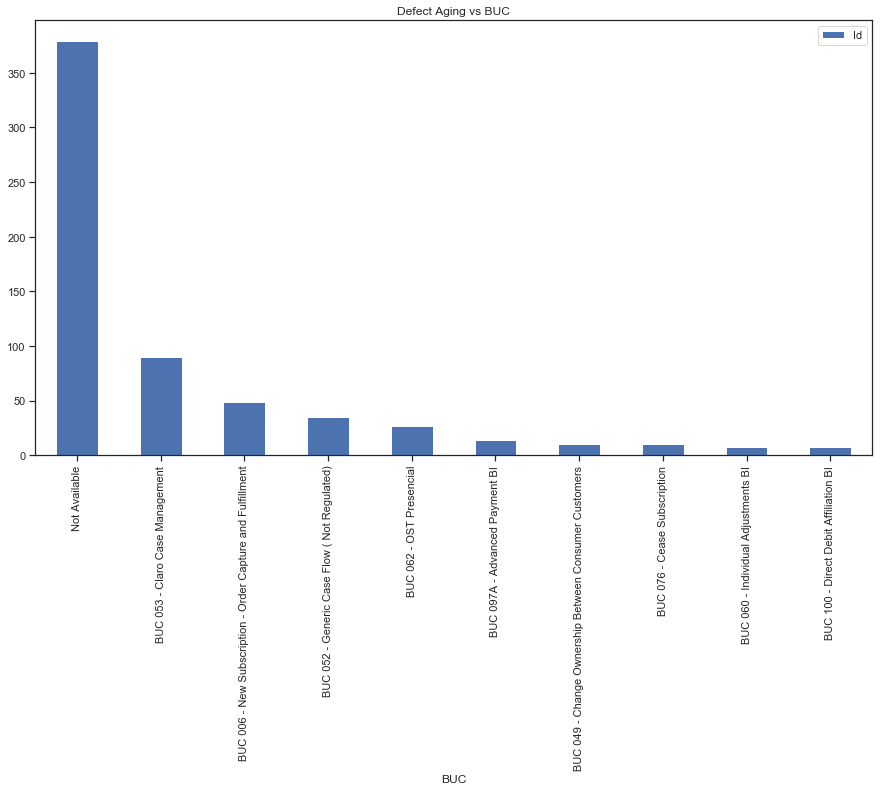

In [982]:
df_tcrm_grpby_BUCDefectAgeInDays_sorted_head10.plot(x = 'BUC', kind = 'bar', figsize=(15,8), title = "Defect Aging vs BUC")

### perform time series analysis

In [896]:
df_tcrm['Creation Date'].min()
df_tcrm['Creation Date'].max()

Timestamp('2018-08-30 18:10:00')

Timestamp('2019-04-13 19:12:00')

In [897]:
df_tcrm.isnull().sum()

Id                     0
Priority               0
Severity               0
Found In               0
BUC                    0
Creation Date          0
Detection Phase        0
Resolution             0
Root Cause Analysis    0
Technology             0
DefectAgeInDays        0
DefectAgeInWeeks       0
dtype: int64

In [898]:
df_tcrm['Creation Date'] = df_tcrm['Creation Date'].dt.date

In [899]:
df_tcrm.head()

,Id,Priority,Severity,Found In,BUC,Creation Date,Detection Phase,Resolution,Root Cause Analysis,Technology,DefectAgeInDays,DefectAgeInWeeks
28,43956,Low,Medium,DROP 2_Sprint 4,BUC 006 - New Subscription - Order Capture and...,2019-04-13,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,1,0
29,43932,Low,Medium,DROP 2_Sprint 2,BUC 084 - Change Number Order Capture and Fulf...,2019-04-13,Intrastack Testing,Fixed,Environment Downtime,MOBILE POST PAID,3,0
37,43807,High,High,DROP 2 - FIJA FUNC,BUC 006 - New Subscription - Order Capture and...,2019-04-12,System Testing (Development Only),Fixed,Minor Change / Improvement,LFI,4,0
41,43699,High,High,DROP 2_Sprint 4,BUC 060 - Individual Adjustments BI,2019-04-11,Intrastack Testing,Fixed,Coding/Software Fault,Not Available,4,0
42,43698,Low,Medium,DROP 2_Sprint 3,BUC 049 - Change Ownership Between Consumer Cu...,2019-04-11,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,0,0


In [900]:
df_tcrm_grpby = df_tcrm.groupby(['Creation Date'])['Id'].count()

In [901]:
type(df_tcrm_grpby)

pandas.core.series.Series

In [902]:
df_tcrm_grpby

Creation Date
2018-08-30     1
2018-08-31     3
2018-09-01     1
2018-09-02     1
2018-09-03     1
2018-09-04     2
2018-09-05     1
2018-09-06     1
2018-09-10     1
2018-09-12     1
2018-09-13     1
2018-09-17     1
2018-09-18     1
2018-09-19     2
2018-09-20     3
2018-09-21     5
2018-09-22     2
2018-09-23     2
2018-09-24     1
2018-09-25     5
2018-09-26     1
2018-09-27     3
2018-09-28     3
2018-10-02     6
2018-10-03     4
2018-10-04     1
2018-10-05     4
2018-10-10     4
2018-10-11     2
2018-10-13     2
              ..
2019-03-12     8
2019-03-13     8
2019-03-14     8
2019-03-15    10
2019-03-16     2
2019-03-17     1
2019-03-18     2
2019-03-19     3
2019-03-20     6
2019-03-21     6
2019-03-22     6
2019-03-23     4
2019-03-24     1
2019-03-25     4
2019-03-26     4
2019-03-27     4
2019-03-28     7
2019-03-29     7
2019-03-30     4
2019-04-02     5
2019-04-03     3
2019-04-04     3
2019-04-05     2
2019-04-06     2
2019-04-08     1
2019-04-09     3
2019-04-10     4


In [903]:
df_tcrm_grpby = df_tcrm_grpby.to_frame()

In [904]:
df_tcrm_grpby.head()

,Id
Creation Date,
2018-08-30,1
2018-08-31,3
2018-09-01,1
2018-09-02,1
2018-09-03,1


In [909]:
df_tcrm_grpby.index = pd.to_datetime(df_tcrm_grpby.index)

Text(0.5,1,'Daily Defect Count Time Series')

Text(0,0.5,'Defect Count')

<Figure size 1080x576 with 0 Axes>

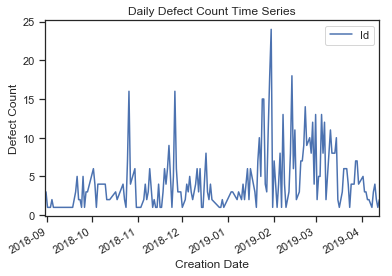

<Figure size 1080x576 with 0 Axes>

In [920]:
#plt.x_label("Defect Creation Date")
#plt.y_label("No of Defects")
df_tcrm_grpby.plot()
plt.title("Daily Defect Count Time Series")
plt.ylabel("Defect Count")
plt.figure(figsize=(15,8))

In [921]:
type(df_tcrm_grpby)

pandas.core.frame.DataFrame

In [922]:
df_tcrm_grpby.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2018-08-30 to 2019-04-13
Data columns (total 1 columns):
Id    177 non-null int64
dtypes: int64(1)
memory usage: 2.8 KB


In [923]:
df_tcrm_grpby.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2018-08-30 to 2019-04-13
Data columns (total 1 columns):
Id    177 non-null int64
dtypes: int64(1)
memory usage: 2.8 KB


Text(0.5,0,'Date')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Weekly Defect Count Time Series')

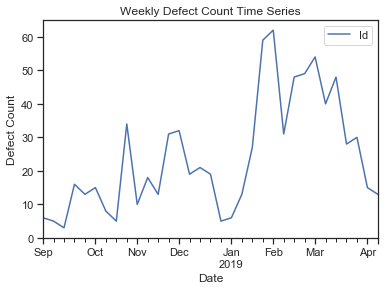

In [925]:
weekly_df_tcrm_grpby = df_tcrm_grpby.resample('W').sum()
weekly_df_tcrm_grpby.plot()
plt.xlabel("Date")
plt.ylabel("Defect Count")
plt.title("Weekly Defect Count Time Series")

Text(0.5,0,'Date')

Text(0,0.5,'Defect Count')

Text(0.5,1,'Monthly Defect Count Time Series')

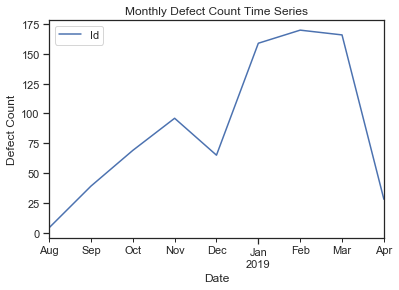

In [926]:
monthly_df_tcrm_grpby = df_tcrm_grpby.resample('M').sum()
monthly_df_tcrm_grpby.plot()
plt.xlabel("Date")
plt.ylabel("Defect Count")
plt.title("Monthly Defect Count Time Series")

In [927]:
#df_tcrm.rename(columns = {'Id' : 'Count'}, inplace = True)
df_tcrm_grpby.columns = ['Count']

In [928]:
df_tcrm_grpby.head()

,Count
Creation Date,
2018-08-30,1
2018-08-31,3
2018-09-01,1
2018-09-02,1
2018-09-03,1


In [929]:
df_tcrm_grpby.columns

Index(['Count'], dtype='object')

In [930]:
df_tcrm_grpby.index = pd.to_datetime(df_tcrm_grpby.index)

In [931]:
df_tcrm_grpby_weekly = pd.DataFrame()

### K-means clustering model building

In [1058]:
df_tcrm_model = df_tcrm.copy(deep = True)

In [1059]:
df_tcrm_model.info()
df_tcrm_model.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 28 to 1510
Data columns (total 12 columns):
Id                     796 non-null int64
Priority               796 non-null object
Severity               796 non-null object
Found In               796 non-null object
BUC                    796 non-null object
Creation Date          796 non-null object
Detection Phase        796 non-null object
Resolution             796 non-null object
Root Cause Analysis    796 non-null object
Technology             796 non-null object
DefectAgeInDays        796 non-null int64
DefectAgeInWeeks       796 non-null object
dtypes: int64(2), object(10)
memory usage: 80.8+ KB


,Id,Priority,Severity,Found In,BUC,Creation Date,Detection Phase,Resolution,Root Cause Analysis,Technology,DefectAgeInDays,DefectAgeInWeeks
28,43956,Low,Medium,DROP 2_Sprint 4,BUC 006 - New Subscription - Order Capture and...,2019-04-13,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,1,0
29,43932,Low,Medium,DROP 2_Sprint 2,BUC 084 - Change Number Order Capture and Fulf...,2019-04-13,Intrastack Testing,Fixed,Environment Downtime,MOBILE POST PAID,3,0
37,43807,High,High,DROP 2 - FIJA FUNC,BUC 006 - New Subscription - Order Capture and...,2019-04-12,System Testing (Development Only),Fixed,Minor Change / Improvement,LFI,4,0
41,43699,High,High,DROP 2_Sprint 4,BUC 060 - Individual Adjustments BI,2019-04-11,Intrastack Testing,Fixed,Coding/Software Fault,Not Available,4,0
42,43698,Low,Medium,DROP 2_Sprint 3,BUC 049 - Change Ownership Between Consumer Cu...,2019-04-11,Intrastack Testing,Fixed,Minor Change / Improvement,MOBILE POST PAID,0,0


In [1060]:
df_tcrm_model['DefectAgeInWeeks'].value_counts()

0     340
1     140
2      83
3      56
4      34
5      34
6      26
7      19
8      19
9      10
10      9
11      7
20      4
15      3
17      3
14      2
19      2
18      1
21      1
27      1
13      1
12      1
Name: DefectAgeInWeeks, dtype: int64

In [1061]:
df_tcrm_model['DefectAgeInWeeks'] = df_tcrm_model['DefectAgeInWeeks'].astype(str)

In [1062]:
df_tcrm_model['DefectAgeInWeeks'].replace(to_replace=['3','4','5'], value = '1000', inplace = True)

In [1063]:
df_tcrm_model['DefectAgeInWeeks'].replace(to_replace=['6','7','8','9','10','11','20','15','17','19','14','18','27','13','12','21'], value = '1000', inplace = True)

In [1064]:
df_tcrm_model['DefectAgeInWeeks'].value_counts()

0       340
1000    233
1       140
2        83
Name: DefectAgeInWeeks, dtype: int64

In [1065]:
df_tcrm_model['Technology'].value_counts()

MOBILE POST PAID                   462
Not Available                      234
HFC                                 71
LFI                                 18
MOBILE POST PAID\nHFC                2
MOBILE POST PAID\nMOBILE HYBRID      2
MOBILE HYBRID                        2
N/A\nMOBILE POST PAID                1
HFC\nMOBILE POST PAID                1
LFI\nHFC                             1
N/A\nHFC                             1
LFI\nMOBILE POST PAID                1
Name: Technology, dtype: int64

In [1066]:
tech_list = ['MOBILE POST PAID','Not Available','HFC','LFI']

In [1067]:
df_tcrm_model = df_tcrm_model.loc[df_tcrm_model['Technology'].isin(tech_list)]

In [1068]:
df_tcrm_model['Technology'].value_counts()
df_tcrm_model.info()

MOBILE POST PAID    462
Not Available       234
HFC                  71
LFI                  18
Name: Technology, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 28 to 1510
Data columns (total 12 columns):
Id                     785 non-null int64
Priority               785 non-null object
Severity               785 non-null object
Found In               785 non-null object
BUC                    785 non-null object
Creation Date          785 non-null object
Detection Phase        785 non-null object
Resolution             785 non-null object
Root Cause Analysis    785 non-null object
Technology             785 non-null object
DefectAgeInDays        785 non-null int64
DefectAgeInWeeks       785 non-null object
dtypes: int64(2), object(10)
memory usage: 79.7+ KB


In [1069]:
df_tcrm_model['Found In'].value_counts()

DROP 2_Sprint 4        256
DROP 2_Sprint 2        245
DROP 2_Sprint 1        164
DROP 2 - FIJA FUNC      85
DROP 2_Sprint 3         22
Integracion_interno      7
DROP 2 - MIGRACION       5
DROP 1_1.1               1
Name: Found In, dtype: int64

In [1070]:
found_in_list = ['DROP 2_Sprint 4', 'DROP 2_Sprint 2','DROP 2_Sprint 1','DROP 2 - FIJA FUNC','DROP 2_Sprint 3']

In [1071]:
df_tcrm_model = df_tcrm_model.loc[df_tcrm_model['Found In'].isin(found_in_list)]

In [1072]:
df_tcrm_model['Found In'].value_counts()
df_tcrm_model.info()

DROP 2_Sprint 4       256
DROP 2_Sprint 2       245
DROP 2_Sprint 1       164
DROP 2 - FIJA FUNC     85
DROP 2_Sprint 3        22
Name: Found In, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 28 to 1510
Data columns (total 12 columns):
Id                     772 non-null int64
Priority               772 non-null object
Severity               772 non-null object
Found In               772 non-null object
BUC                    772 non-null object
Creation Date          772 non-null object
Detection Phase        772 non-null object
Resolution             772 non-null object
Root Cause Analysis    772 non-null object
Technology             772 non-null object
DefectAgeInDays        772 non-null int64
DefectAgeInWeeks       772 non-null object
dtypes: int64(2), object(10)
memory usage: 78.4+ KB


In [1073]:
df_tcrm_model.drop(['DefectAgeInDays','Priority', 'Severity','Technology','Id', 'Resolution', 'BUC', 'Creation Date'], axis=1, inplace=True)

In [1074]:
df_tcrm_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 28 to 1510
Data columns (total 4 columns):
Found In               772 non-null object
Detection Phase        772 non-null object
Root Cause Analysis    772 non-null object
DefectAgeInWeeks       772 non-null object
dtypes: object(4)
memory usage: 30.2+ KB


In [1075]:
df_tcrm_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 28 to 1510
Data columns (total 4 columns):
Found In               772 non-null object
Detection Phase        772 non-null object
Root Cause Analysis    772 non-null object
DefectAgeInWeeks       772 non-null object
dtypes: object(4)
memory usage: 30.2+ KB


In [1076]:
#dummy coding using loop
for col in df_tcrm_model.columns:
    if df_tcrm_model[col].dtype == 'object':
        df_tcrm_model[col] = pd.Categorical(df_tcrm_model[col]).codes

In [1077]:
df_tcrm_model.head()

,Found In,Detection Phase,Root Cause Analysis,DefectAgeInWeeks
28,4,1,6,0
29,2,1,3,0
37,0,8,6,0
41,4,1,0,0
42,3,1,6,0


In [1078]:
#Scale all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scId = MinMaxScaler(feature_range=(0,1))
arr_scId = scId.fit_transform(df_tcrm_model)
df_scId = pd.DataFrame(arr_scId, columns = df_tcrm_model.columns)
df_scId.head()
df_scId.describe()

,Found In,Detection Phase,Root Cause Analysis,DefectAgeInWeeks
0,1.00,0.111111,0.333333,0.0
1,0.50,0.111111,0.166667,0.0
2,0.00,0.888889,0.333333,0.0
3,1.00,0.111111,0.000000,0.0
4,0.75,0.111111,0.333333,0.0


,Found In,Detection Phase,Root Cause Analysis,DefectAgeInWeeks
count,772.000000,772.000000,772.000000,772.000000
mean,0.564767,0.278929,0.291811,0.358377
std,0.348494,0.309053,0.281192,0.354422
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.111111,0.000000,0.000000
50%,0.500000,0.111111,0.333333,0.333333
75%,1.000000,0.111111,0.444444,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [1079]:
#build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scId)
    error.append(clusters.inertia_/100)

df = pd.DataFrame({"Cluster_number": num_of_clusters, "Error_Terms": error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_number,Error_Terms
0,2,2.450941
1,3,1.840212
2,4,1.464154
3,5,1.255314
4,6,1.094951
5,7,0.945247
6,8,0.834984
7,9,0.753885


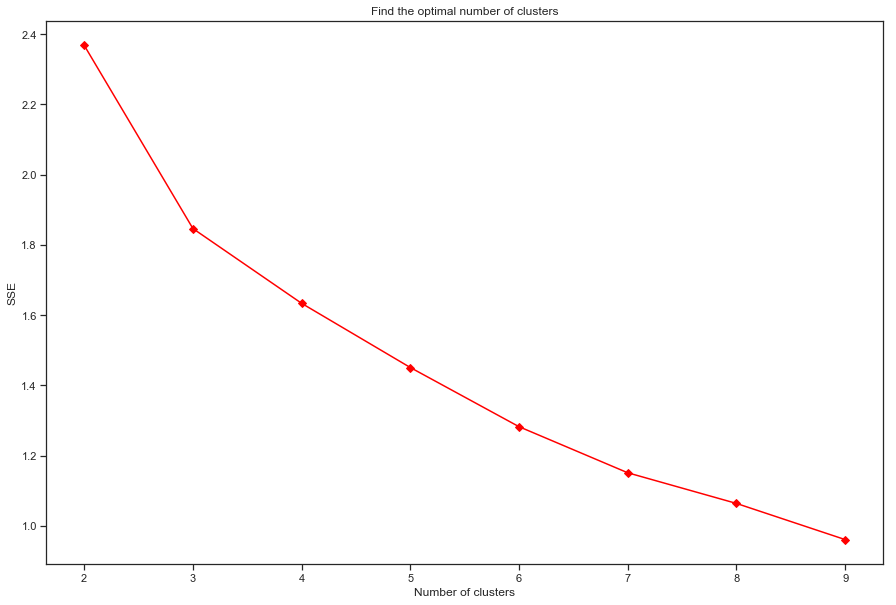

In [997]:
#find out right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_number, df.Error_Terms, marker = "D", color="red")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Find the optimal number of clusters")
plt.show();

In [1080]:
#build with 4 clusters
clusters = KMeans(3)
clusters.fit(df_scId)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,

In [1081]:
df_tcrm_model['cluster'] = clusters.labels_
df_tcrm_model.head()

,Found In,Detection Phase,Root Cause Analysis,DefectAgeInWeeks,cluster
28,4,1,6,0,2
29,2,1,3,0,2
37,0,8,6,0,1
41,4,1,0,0,2
42,3,1,6,0,2


In [1082]:
df_tcrm_model.to_csv("C:\\DataSets\\Ericsson\\Defects\\amx_peru_defects_clusteringmodel.csv")